<a href="https://colab.research.google.com/github/ENKI0311/Google_Gemma_2_LLM_Challenge/blob/main/Google_Unlock_Global_Communication_with_Gemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Gemma 2 Challenge

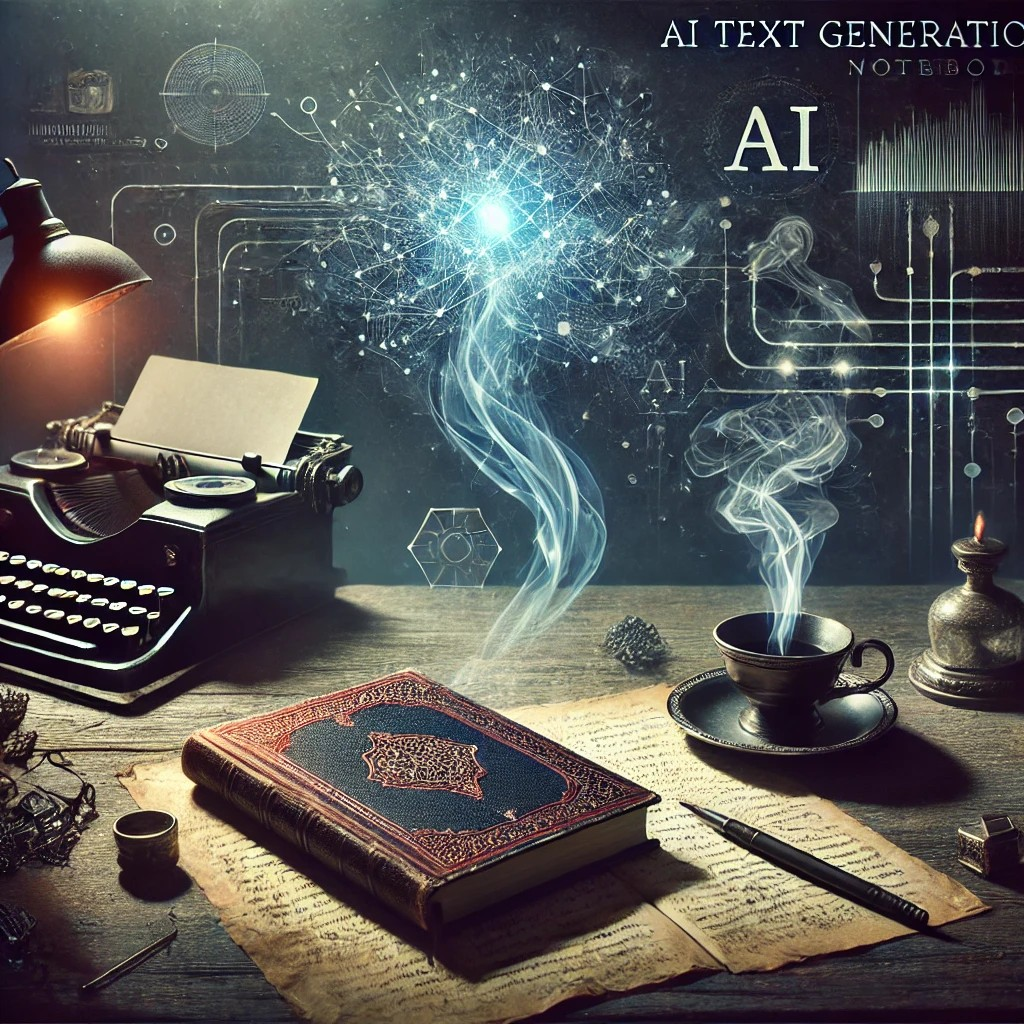

The **Google GEMMA 2 Challenge** (short for Generative Evaluation of Massive Model Applications) is a benchmark created by Google to evaluate large language models, like GPT or other advanced AI systems. GEMMA 2 assesses these models based on their ability to generate coherent, creative, and contextually relevant text across various prompts and scenarios, including complex storytelling, factual accuracy, and contextual understanding.

This challenge is designed to push the boundaries of generative AI capabilities by testing model performance on diverse tasks, ensuring that these systems can produce high-quality output across different use cases and domains.

Model Details
Gemma is Google's family of lightweight, state-of-the art open models built from the same research and technology used to create the Gemini models. Gemma models are available with and without instruction tuning and come in two sizes: 2 billion and 7 billion parameters. Gemma 1.1 is the latest weights refresh. See the model card below for benchmarks, data sources, and intended use cases.

Weights are released under the Gemma License. Keras model code is released under the Apache 2 License.

Links
Gemma API Documentation
Gemma Model Card
KerasHub Beginner Guide
KerasHub Model Publishing Guide
Installation
Keras and Kerashub can be installed with:

pip install -U -q keras-hub
pip install -U -q keras>=3
Jax, TensorFlow, and Torch come preinstalled in Kaggle Notebooks. For instructions on installing them in another environment see the Keras Getting Started page.



Geneva website source:  https://ebible.org/pdf/enggnv/

# By: John Chilton CodeAI

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since you're working with a local HTML file (from the Project Gutenberg zip), you can extract the text using Python libraries like BeautifulSoup to parse the HTML content. Here’s a quick guide on how to extract the text from that HTML file.

In [11]:
from bs4 import BeautifulSoup

# Path to your HTML file
html_file_path = r"/content/pg10-images.html"

# Open and read the HTML file
with open(html_file_path, "r", encoding="utf-8") as html_file:
    soup = BeautifulSoup(html_file, "html.parser")

# Extract the text from the HTML content
extracted_text = soup.get_text()

# Optional: Save the extracted text to a file for easier review
output_file = "extracted_bible_text.txt"
with open(output_file, "w", encoding="utf-8") as text_file:
    text_file.write(extracted_text)

print(f"Text successfully extracted and saved to {output_file}")


Text successfully extracted and saved to extracted_bible_text.txt


Text Extraction and Cleanup: In this step, we're extracting text from the Geneva Bible PDFs stored in Google Drive, using PyPDF2 to process each PDF page-by-page. We've added error handling to make the extraction more robust. After extracting, we're saving the combined text to a .txt file for future use. This step ensures we have the full text ready for further cleaning and analysis.

In [35]:
import PyPDF2
import os

# Define the directory containing the Geneva Bible PDFs
pdf_directory = '/content/drive/MyDrive/lab_mount/Google Gemma 2 Compitition/Geneva Bible 1599 PDF'

# Initialize a dictionary to store the text from each PDF
geneva_bible_texts = {}

# Loop through all PDF files in the directory
for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith('.pdf'):
        file_path = os.path.join(pdf_directory, pdf_file)
        try:
            # Open the PDF file in read-binary mode
            with open(file_path, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                text = ""
                # Loop through all the pages in the PDF
                for page_num in range(len(reader.pages)):
                    try:
                        page = reader.pages[page_num]
                        text += page.extract_text() + "\n"
                    except Exception as e:
                        print(f"Failed to extract text from page {page_num} of {pdf_file}: {e}")
                # Store the extracted text with the book name (without .pdf extension) as the key
                book_name = pdf_file.replace('.pdf', '')
                geneva_bible_texts[book_name] = text
        except Exception as e:
            print(f"Failed to read {pdf_file}: {e}")

# Optionally: Save all the extracted text into a single file
output_path = '/content/drive/MyDrive/lab_mount/Google Gemma 2 Compitition/geneva_bible_extracted_text.txt'
with open(output_path, 'w') as output_file:
    for book, text in geneva_bible_texts.items():
        output_file.write(f"Book: {book}\n{text}\n\n")

print(f"Text extraction completed and saved to '{output_path}'.")


Text extraction completed and saved to '/content/drive/MyDrive/lab_mount/Google Gemma 2 Compitition/geneva_bible_extracted_text.txt'.


### Quick Quality Check

In [36]:
with open('/content/drive/MyDrive/lab_mount/Google Gemma 2 Compitition/geneva_bible_extracted_text.txt', 'r') as file:
    extracted_text = file.read()
    print(extracted_text[:1000])  # Print the first 1000 characters to check the output


Book: enggnv_all

ii
Geneva Bible 1599
The Geneva Bible inOld English of1599
Public Domain
Language: English
Dialect: Old
This digital copy isfreely available world-wide, with nocopyright restrictions, courtesy ofeBible.org and many others. Note
that thespelling used istheoriginal spelling, which isnotmodern English.
2024-03-16
PDF generated using Haiola and XeLaTeX on7Nov 2024 from source files dated 16Mar 2024
cb1feedd-30b1-5769-8574-fc9e5c9ce645
Contents
Genesis ..............1
Exodus ..............58
Leviticus .............106
Numbers .............141
Deuteronomy ..........190
Joshua ..............231
Judges ..............259
Ruth ...............286
1Samuel .............290
2Samuel .............326
1Kings ..............356
2Kings ..............392
1Chronicles ...........426
2Chronicles ...........458
Ezra ................497
Nehemiah ............509
Esther ..............526
Job ................535
Psalms ..............565
Proverbs .............637
Ecclesiastes ...........663
Song o

To begin text preprocessing for the King James Bible, we typically follow several steps to clean and prepare the text for analysis or modeling. Here's how we can approach it:

Steps for Text Preprocessing:
Lowercasing: Convert all text to lowercase to ensure uniformity.
Removing Non-Alphanumeric Characters: Remove punctuation, special characters, and numbers.
Tokenization: Split the text into individual words (tokens).
Stopword Removal: Remove common words (e.g., "the", "and", "is") that do not add much meaning.
Lemmatization or Stemming: Reduce words to their base or root form.
Optional - Keep Structure: If needed, preserve structure (e.g., chapters and verses) for referencing purposes.
Code to Preprocess the Bible Text:

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure stopwords and tokenizer are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Path to the extracted text file
file_path = "/content/extracted_bible_text.txt"

# Load the text from the file
with open(file_path, "r", encoding="utf-8") as file:
    bible_text = file.read()

# Step 1: Convert text to lowercase
bible_text = bible_text.lower()

# Step 2: Remove non-alphanumeric characters (keep spaces)
bible_text = re.sub(r'[^a-z\s]', '', bible_text)

# Step 3: Tokenize the text into words
tokens = word_tokenize(bible_text)

# Step 4: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Step 5: Lemmatization (convert words to base form)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Optional: Join the lemmatized tokens back into a string (if needed for further processing)
preprocessed_text = ' '.join(lemmatized_tokens)

# Save the preprocessed text to a file
output_file = "preprocessed_bible_text.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.write(preprocessed_text)

print(f"Text preprocessing complete. Preprocessed text saved to {output_file}.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing complete. Preprocessed text saved to preprocessed_bible_text.txt.


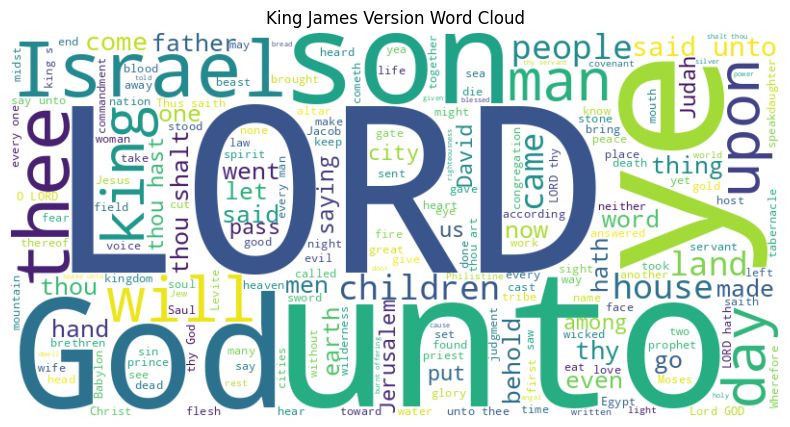

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the King James Bible text from the specified file path
file_path = "/content/extracted_bible_text.txt"
with open(file_path, "r", encoding="utf-8") as file:
    bible_text = file.read()

# Create and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bible_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("King James Version Word Cloud")
plt.show()

---

**Geneva Bible Text Preprocessing**: In this cell, we preprocess the extracted text from the Geneva Bible to prepare it for further analysis. The steps include:
1. **Lowercasing**: Converting all text to lowercase to maintain consistency.
2. **Removing Special Characters**: Stripping out any non-alphanumeric characters to simplify the text.
3. **Tokenization**: Breaking the text into individual words (tokens) for easier analysis.
4. **Removing Stopwords**: Filtering out common English words like "the," "and," "is" that don’t add much semantic value.
5. **Lemmatization**: Reducing words to their base or dictionary form for uniformity (e.g., "running" to "run").

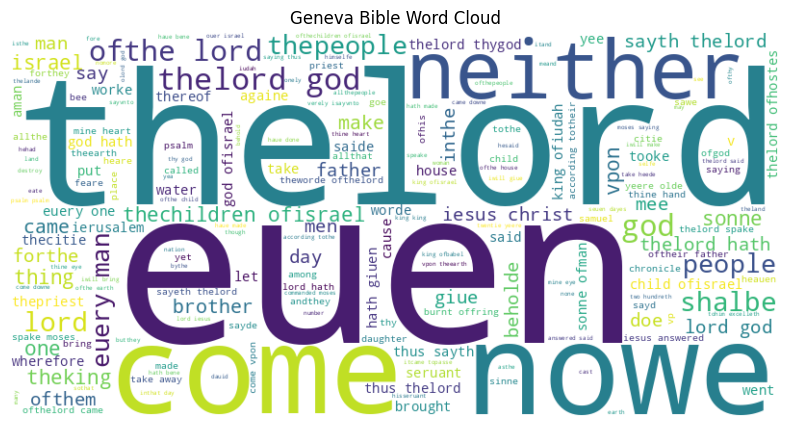

In [32]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the text file for Geneva Bible
file_path = "/content/drive/MyDrive/lab_mount/Google Gemma 2 Compitition/preprocessed_geneva_bible_text.txt"
with open(file_path, "r", encoding="utf-8") as file:
    geneva_text = file.read()

# More aggressive cleaning of metadata and irrelevant information
# Remove large blocks of metadata and book titles
geneva_text = re.sub(r'(book enggnvall ii.*?nov cbfeeddbfcecce content)', '', geneva_text, flags=re.DOTALL)
geneva_text = re.sub(r'(public domain.*?courtesy ofebibleorg many others)', '', geneva_text, flags=re.DOTALL)

# Remove all book names to avoid unnecessary repetition in word cloud
for book in books:
    geneva_text = re.sub(r'\b' + re.escape(book) + r'\b', '', geneva_text, flags=re.IGNORECASE)

# Remove additional unwanted information like extra whitespace
geneva_text = re.sub(r'\s+', ' ', geneva_text)

# Remove common archaic words like 'thou', 'thee', 'shalt', etc.
common_words_to_remove = ['thou', 'thee', 'shalt', 'hast', 'unto', 'saith', 'vnto', 'hee', 'ye']
for word in common_words_to_remove:
    geneva_text = re.sub(r'\b' + word + r'\b', '', geneva_text, flags=re.IGNORECASE)

# Create and display a word cloud with the cleaned Geneva text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(geneva_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Geneva Bible Word Cloud")
plt.show()


### Verify the Preprocessed File

In [31]:
with open("/content/drive/MyDrive/lab_mount/Google Gemma 2 Compitition/preprocessed_geneva_bible_text.txt", "r") as file:
    preprocessed_text_sample = file.read(1000)  # Read the first 1000 characters to preview
    print(preprocessed_text_sample)

book enggnvall ii geneva bible geneva bible inold english public domain language english dialect old digital copy isfreely available worldwide nocopyright restriction courtesy ofebibleorg many others note thespelling used istheoriginal spelling isnotmodern english pdf generated using haiola xelatex onnov source file dated mar cbfeeddbfcecce content genesis exodus leviticus number deuteronomy joshua judge ruth samuel samuel king king chronicle chronicle ezra nehemiah esther job psalm proverb ecclesiastes song ofsolomon isaiah jeremiah lamentation ezekiel daniel hosea joel amos obadiah jonah micah nahum habakkuk zephaniah haggai zechariah malachi nt matthew mark luke john act roman corinthian corinthian galatian ephesian philippian colossian thessalonian thessalonian timothy timothy titus philemon hebrew james peter peter john john john jude revelation genesis genesis first book ofmoses called genesis inthe beginning god created heauen theearth theearth without forme void anddarkenesse v

# Log Into Hugging Face

In [33]:
from huggingface_hub import notebook_login

# Log in to your Hugging Face account
notebook_login()


# Load the Model

In [34]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-9b")
model = AutoModelForCausalLM.from_pretrained("google/gemma-2-9b")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/4.84G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/2.38G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

# Read in the Captured texts

In [37]:
# Paths to the saved text files
geneva_path = "/content/drive/MyDrive/lab_mount/Google Gemma 2 Compitition/preprocessed_geneva_bible_text.txt"
king_james_path = "/content/extracted_bible_text.txt"

# Load Geneva Bible text
with open(geneva_path, "r", encoding="utf-8") as file:
    geneva_text = file.read()

# Load King James Bible text
with open(king_james_path, "r", encoding="utf-8") as file:
    king_james_text = file.read()


# Generate Text Prompts

## Prompt_1:

This prompt sets up a text generation model to complete the phrase “In the beginning God created” using a pipeline from Hugging Face's transformers library. It generates up to 100 tokens, limiting to one sequence, and truncates if the generated text exceeds the set length. Finally, it outputs and displays the generated continuation.

In [38]:
from transformers import pipeline

# Set up the text generation pipeline and ensure GPU usage
generator = pipeline('text-generation', model=model, tokenizer=tokenizer, device=0)

# Define a prompt to generate text
prompt = "In the beginning God created"

# Generate text from the model with specified length and truncation
output = generator(prompt, max_length=100, num_return_sequences=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

In the beginning God created the heavens and the earth. Now the earth was formless and empty, darkness was over the surface of the deep, and the Spirit of God was hovering over the waters. And God said, “Let there be light,” and there was light. God saw that the light was good, and he separated the light from the darkness. God called the light “day,” and the darkness he called “night.” And there was evening, and there was morning—the first


## Prompt_2:

This prompt defines a new starting text, “And the Lord spoke to Moses, saying,” for the model to continue generating text. It generates up to 100 tokens in one sequence and truncates any excess. The resulting continuation is then printed.

In [39]:
# Define a new prompt for text generation
new_prompt = "And the Lord spoke to Moses, saying,"

# Generate text from the model based on the new prompt
output = generator(new_prompt, max_length=100, num_return_sequences=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

And the Lord spoke to Moses, saying, “Speak to the children of Israel, and say to them, ‘When you come into the land of your habitation, which I give to you, and shall make a plague among you, then you shall take a heifer, the first of the herd, and offer her a burnt offering to the Lord. The priest shall take some of the blood of the burnt offering and put it on the horns of the altar, and the rest of the blood


## Prompt_3

This prompt begins with the text “The Lord is my shepherd; I shall not want” for the model to expand upon. It generates up to 100 tokens in a single sequence, truncating if necessary, and then outputs the generated continuation.

In [40]:
# Define a new prompt for text generation
another_prompt = "The Lord is my shepherd; I shall not want."

# Generate text from the model based on the new prompt
output = generator(another_prompt, max_length=100, num_return_sequences=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

The Lord is my shepherd; I shall not want. He maketh me to lie down in green pastures: he leadeth me beside the still waters. He restoreth my soul: he leadeth me in the paths of righteousness for his name's sake. Yea, though I walk through the valley of the shadow of death, I will fear no evil: for thou art with me; thy rod and thy staff they comfort me. Thou preparest a table before me in the


## Prompt_4:

This prompt starts with the text “Blessed are the peacemakers, for they shall be called” for the model to continue generating. It produces up to 100 tokens with adjustments to reduce repetition, including sampling with a `temperature` setting and a `repetition_penalty` of 1.2 to enhance variety in the output. The resulting text is then printed.

In [41]:
# Define a new prompt for text generation
new_prompt = "Blessed are the peacemakers, for they shall be called"

# Generate text with modified parameters to reduce repetition
output = generator(new_prompt, max_length=100, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)


# Print the generated text
print(output[0]['generated_text'])

Blessed are the peacemakers, for they shall be called children of God. Jesus Christ is our model and teacher as we seek to spread love and forgiveness in this world that cries out daily with violence throughout its land (Matthew 5:9).

But how can such hatred arise? People often fail to see differences between others; rather than uniting together during times of discord or distress—when everyone needs each other’s support most!—they look inward exclusively at themselves while ignoring those around them completely


## Prompt_5:

This prompt begins with “And I saw a new heaven and a new earth, for the first heaven and the first earth were passed away” for the model to expand upon. It generates up to 100 tokens, with settings to reduce repetition—using sampling (`temperature=True`) and a repetition penalty of 1.2. The generated continuation is then printed.

In [42]:
# Define a new prompt for text generation
revelation_prompt = "And I saw a new heaven and a new earth, for the first heaven and the first earth were passed away"

# Generate text with modified parameters to reduce repetition
output = generator(revelation_prompt, max_length=100, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

And I saw a new heaven and a new earth, for the first heaven and the first earth were passed away: and there was [no] more sea. And I John saw the holy city; Jerusalem coming down from God out of heaven… 21

The great day is at hand when all will see Jesus as their Savior or judge – who’s going to win?


## Prompt_6:

This prompt begins with “Your time is limited, so don't waste it living someone else's life. Have the courage to follow your heart and intuition” for the model to continue. It generates up to 100 tokens, applying settings to reduce repetition with sampling (`temperature=True`) and a repetition penalty of 1.2, and then prints the generated text.

In [43]:
# Define a new prompt for text generation
jobs_prompt = "Your time is limited, so don't waste it living someone else's life. Have the courage to follow your heart and intuition."

# Generate text with modified parameters to reduce repetition
output = generator(jobs_prompt, max_length=100, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

Your time is limited, so don't waste it living someone else's life. Have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary....

The goal of every creative person working in this industry should be perfection as close a thing that we can get our human minds through practice & hard work combined w/ inspiration from both within us an externally - where art meets reality!


## Prompt_7:

This prompt starts with “We are effectively destroying ourselves by violence masquerading as love” for the model to expand upon. It generates up to 100 tokens with settings to enhance diversity, using sampling (`temperature=True`) and a repetition penalty of 1.2, then prints the resulting continuation.

In [44]:
# Define a new prompt for text generation
Ronald_David_Laning = "We are effectively destroying ourselves by violence masquerading as love."

# Generate text with modified parameters to reduce repetition
output = generator(Ronald_David_Laning, max_length=100, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

We are effectively destroying ourselves by violence masquerading as love.

There was once a time before I became an ardent follower of Jesus that it wasn’t uncommon to hear the idea floated around in Christian circles about how we (a collective ‘we’) have been “saved” from God’s wrath and judgement. This doesn’t appear anywhere within Scripture, but those with ill intent for the world seem quite happy to distort reality in order to make Christianity more attractive. They do this because they


## Prompt_8:

This prompt starts with “write a ship manifest of religious items stolen,” guiding the model to generate a detailed list or narrative. It produces up to 1000 tokens with settings for creative variation, using sampling (`temperature=True`) and a repetition penalty of 1.2, then outputs the generated text.

In [45]:
# Define a new prompt for text generation
Pirate = "write a ship manifest of religious items stolen"

# Generate text with modified parameters to reduce repetition
output = generator(Pirate, max_length=1000, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

write a ship manifest of religious items stolen from the Church that he brought through customs. 40 He was arrested and had his property
confiscated on August 6th at La Rochelle along with all Catholic holy vestments, ornaments in silver and gold leafed glass. In addition to confiscating more than two thousand statues made by Father John Smith (d.1953). The new directorate began selling some artifacts as they confiscated them or sold them piecemeal during what remains one their most profitable enterprises since its start back then; but now because much has been removed from these places where it once stood tall before everyone else could have access.


## Prompt_9:

This prompt begins with “The ancient door creaked open, revealing a hidden world beyond the mountains, where dragons still soared across the skies,” inviting the model to continue with a fantasy-themed narrative. It generates up to 500 tokens with settings for creative output, using sampling (`temperature=True`) and a repetition penalty of 1 to encourage variety, then prints the generated continuation.

In [46]:
# Define a new prompt for text generation
writer = "The ancient door creaked open, revealing a hidden world beyond the mountains, where dragons still soared across the skies."

# Generate text with modified parameters to reduce repetition
output = generator(writer, max_length=500, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

The ancient door creaked open, revealing a hidden world beyond the mountains, where dragons still soared across the skies. The land was fertile, lush with greenery, but not the type to make one hungry. No, this was the realm of the wild dragons, free from the tyranny of humans and the laws of nature.

As I explored, I discovered that the land was not filled with the usual dragons, but with a new race that had emerged from myth, the ancient fire-breathing creatures that could challenge the might of any other dragon. These dragons were feared by all, but they were also respected for their power and their fierce loyalty to their kin.

As I continued my journey, I came across the dragon city, hidden deep within the mountains. The city was built entirely of ancient stones, and its architecture was a marvel to behold. The air was filled with the scent of spice, and the streets were bustling with activity. I could see the people of the city, scurrying about in their colorful robes, their eyes

## Prompt_10:

This prompt begins with “What is 9,000 * 9,000?” prompting the model to calculate or discuss this mathematical expression. It generates up to 500 tokens with creative variation settings, using sampling (`temperature=True`) and a repetition penalty of 1 to allow diverse responses, then outputs the generated result.

In [47]:
# Define a new prompt for text generation
Math_Expert = "What is 9,000 * 9,000?"

# Generate text with modified parameters to reduce repetition
output = generator(Math_Expert, max_length=500, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

What is 9,000 * 9,000?

What is 2* 2* 2*...2* 2?

What is 10-2

Write down this multiplication

(1,000 x 10) x 1 =

Write down the missing numbers in these equations

10 - 3 = 7 -

If 9 + (4 x 7) / 1 =? Then what is the correct answer?

110,000 - 99,999


## Prompt_11:

This prompt, titled **Detective_Noir**, sets the scene for a suspenseful, noir-style story. It instructs the model to create a narrative where a hard-boiled, skeptical detective in a dark, smoky room gradually uncovers a hidden biblical mystery.

The details emphasize a gritty atmosphere, with dim lighting, thick smoke, and a mysterious leather-bound book containing an ancient prophecy written in an unfamiliar language. The story should evoke moral ambiguity and a sense of impending doom as the detective, haunted by his past, deciphers each clue in the hidden gospel.

The generation parameters:
- **max_length=1000**: Allows for an extended, in-depth narrative.
- **temperature=0.7**: Adds creative variation while maintaining coherence.
- **repetition_penalty=1.2**: Reduces repetitive phrasing, supporting a suspenseful flow.
- **do_sample=True**: Enhances creativity in the generated story.

The final output is printed, presenting the noir-style mystery as generated text.

In [48]:
# Define the noir-style prompt
Detective_Noir = """
Narrate a suspenseful, noir-style story where a gritty, hard-boiled detective in a dark, smoky room uncovers a hidden biblical mystery.
The detective is skeptical, chain-smoking, and haunted by his own past.
The setting should be shadowy, with descriptions of dim lighting, thick smoke, and a mysterious leather-bound book containing an ancient prophecy in an unfamiliar language.
Emphasize the detective's sense of moral ambiguity and a feeling of impending doom as he uncovers each clue in the hidden gospel.
"""

# Generate text with noir and suspenseful tones
output = generator(Detective_Noir, max_length=1000, num_return_sequences=1, temperature=0.7, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



Narrate a suspenseful, noir-style story where a gritty, hard-boiled detective in a dark, smoky room uncovers a hidden biblical mystery.
The detective is skeptical, chain-smoking, and haunted by his own past.
The setting should be shadowy, with descriptions of dim lighting, thick smoke, and a mysterious leather-bound book containing an ancient prophecy in an unfamiliar language.
Emphasize the detective's sense of moral ambiguity and a feeling of impending doom as he uncovers each clue in the hidden gospel.
Use descriptive words like "enigmatic," "sinister," "ominous," to enhance the atmosphere

#darkroomdetective #mysterynovel


# Included Bible Texts Prompting with Gemma 2

In [50]:
# Load the Geneva Bible text file
file_path = "/content/drive/MyDrive/lab_mount/Google Gemma 2 Compitition/preprocessed_geneva_bible_text.txt"
with open(file_path, "r", encoding="utf-8") as file:
    geneva_text = file.read()


In [60]:
import torch

# Set the device (use the A100 GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU (assuming model and tokenizer are already loaded)
model.to(device)

# Step 1: Manually provide passages from Genesis Chapter 1
# Copy the passages directly after verifying them in your files
geneva_scripture = """
In the beginning God created the heaven and the earth. And the earth was without forme, and voyde, and darkenesse was upon the deepe, and the Spirit of God moved upon the waters.
And God said, Let there be light: and there was light. And God saw the light, that it was good: and God separated the light from the darkenesse. And God called the light, Day, and the darkenesse he called Night. So the evening and the morning were the first day.
"""

king_james_scripture = """
In the beginning God created the heaven and the earth. And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.
And God said, Let there be light: and there was light. And God saw the light, that it was good: and God divided the light from the darkness. And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.
"""

# Step 2: Create the prompt with the meaningful and correctly extracted passages
prompt = (
    f"Below are two passages from different versions of the Bible:\n\n"
    f"Geneva Bible Passage:\n{geneva_scripture}\n\n"
    f"King James Version Passage:\n{king_james_scripture}\n\n"
    "Please compare the two passages in terms of tone, word choice, and meaning. "
    "What are the main similarities and differences between the Geneva Bible and the King James Version? "
    "How do these differences affect the way the Bible is read and understood?"
)

# Step 3: Encode the prompt and move it to the same device as the model
inputs = tokenizer(prompt, return_tensors="pt").to(device)

# Generate a response from the model
with torch.no_grad():
    outputs = model.generate(inputs.input_ids, max_length=300, num_return_sequences=1)

# Decode the generated response and print it
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)


Below are two passages from different versions of the Bible:

Geneva Bible Passage:

In the beginning God created the heaven and the earth. And the earth was without forme, and voyde, and darkenesse was upon the deepe, and the Spirit of God moved upon the waters.
And God said, Let there be light: and there was light. And God saw the light, that it was good: and God separated the light from the darkenesse. And God called the light, Day, and the darkenesse he called Night. So the evening and the morning were the first day.


King James Version Passage:

In the beginning God created the heaven and the earth. And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.
And God said, Let there be light: and there was light. And God saw the light, that it was good: and God divided the light from the darkness. And God called the light Day, and the darkness he called Night. And the evening and the morning were th

# Prompt_12

# Prompt_13
